<img src="https://pandas.pydata.org/static/img/pandas.svg" width="250">


## <center> Clustering - Kmeans

# Solución de un problema de CLUSTERING en Machine Learning



1.   Análisis del problema. Eleccion de un modelo.
2.   Extracción del dataset. Limpieza
1.   EDA. Analisis de la dataset
1.   Feature engineering [ determinar las features]
2.   Definir los hiperparametros del modelo
2.   Crear el modelo y Entrenarlo
1.   Hacer predicciones
1.   Calificar el modelo
2.   Visualizar el resultado del modelo
1.   Conclusiones


# Problema de clustering de data de pinguinos

1. Análisis del problema


Usted es un ingeniero de Machine Learning trabajando para Green-Peace. Le piden que desarrolle un modelo que permita encontrar grupos similares en un dataset que contiene datos sobre diferentes pinguinos.

Tenga en cuenta las columnas:

*   bill_depth_mm: Altura del pico en milimetros
*   bill_length_mm: Longitud del pico en milimetros
*   flipper_length_mm: Longitud de las aletas en milimetros
*   body_mass_g: Masa corporal del pinguino en gramos



Se puede utilizar un algoritmo de Clustering como K-means.

2. Extraccion del dataset. Limpieza

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins = penguins.dropna()

penguins.sample(3)




,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
254,Gentoo,Biscoe,49.1,14.8,220.0,5150.0,Female
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,Female


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
# Select numerical features for clustering
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df = penguins


Normalizar las features

In [ ]:
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [ ]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])
df=pd.DataFrame(df_scaled,columns=numeric_cols)

df['species']=penguins['species']

df.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,-0.896042,0.780732,-1.426752,-0.568475,Adelie
1,-0.822788,0.119584,-1.069474,-0.506286,Adelie
2,-0.676280,0.424729,-0.426373,-1.190361,Adelie


3. EDA. Análisis del dataset

In [ ]:
df.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,3.330000e+02,3.330000e+02,3.330000e+02
mean,0.000000,-4.267524e-17,8.535048e-17,-1.280257e-16
std,1.001505,1.001505e+00,1.001505e+00,1.001505e+00
min,-2.177987,-2.067291e+00,-2.069852e+00,-1.874435e+00
25%,-0.822788,-7.958519e-01,-7.836512e-01,-8.172292e-01
50%,0.092887,6.872642e-02,-2.834620e-01,-1.953432e-01
75%,0.843741,7.807321e-01,8.598276e-01,7.063915e-01
max,2.858227,2.204743e+00,2.146028e+00,2.603144e+00


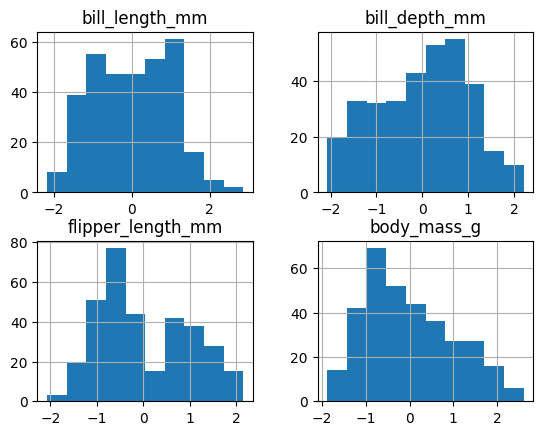

In [ ]:
df[numeric_cols].hist();

In [ ]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


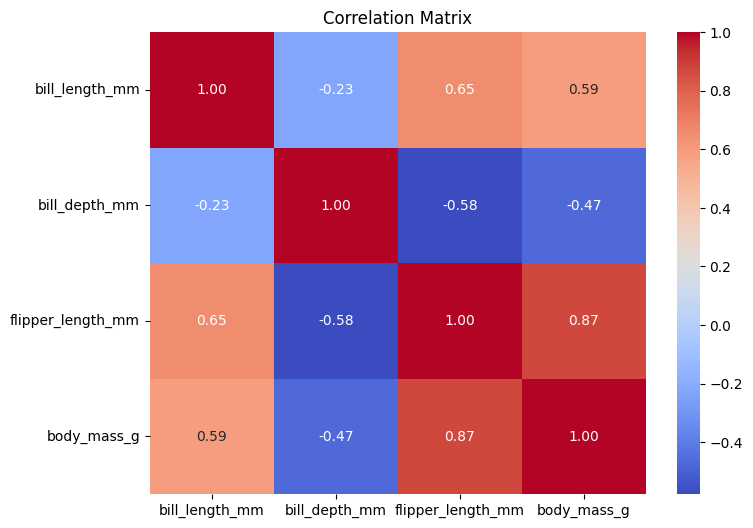

In [ ]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Display correlation values on the heatmap
    fmt=".2f",           # Format the correlation values
    cmap="coolwarm",     # Color map
    cbar=True            # Show the color bar
)
plt.title("Correlation Matrix")
plt.show()

4. Feature engineering [ determinar variables independientes(X) y dependiente(y)]

In [ ]:
features=numeric_cols
# Prepare the features and target
X = df[features]


5. Definir hiperparametros del modelo.

En este caso se debe buscar el parametro "numero de clusters". Para ello se usa el metodo del "codo".

El Método del Codo es una técnica utilizada para determinar el número óptimo de clusters (agrupaciones) en el algoritmo de K-Means. Se basa en analizar cómo la inercia (también conocida como suma de cuadrados intra-clúster, WCSS) cambia al aumentar el número de clusters.

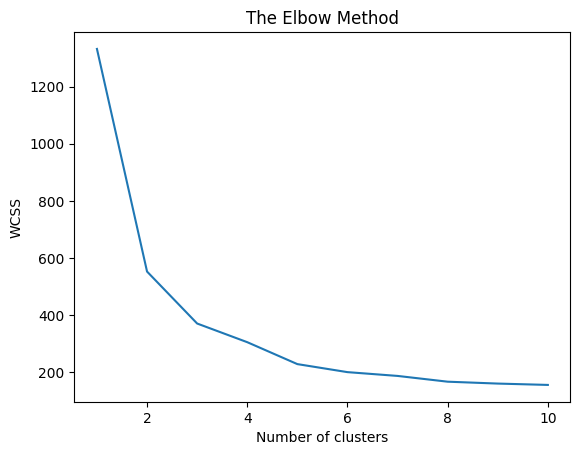

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

6. Crear y Entrenar (Ajustar) el modelo.

In [ ]:
# Apply K-Means clustering
model = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = model.fit_predict(X)

7. Hacer predicciones

In [ ]:
# Add cluster labels to the dataset
df['Cluster'] = df['Cluster'].astype(str)


8. Calificar el modelo

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Fit the K-Means model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Calculate validity metrics
inertia = kmeans.inertia_
silhouette = silhouette_score(X, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)

# Display results
print(f"Inertia: {inertia}")
print("""Measures how tightly data points are clustered around their cluster center.
Lower inertia indicates tighter clusters.""")
print()
print(f"Silhouette Score: {silhouette}")

print("Measures how similar a data point is to its own cluster compared to other clusters.")
print("Range: [-1, 1]. Higher values indicate well-separated and dense clusters.")
print()

print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print("Measures the ratio of between-cluster variance to within-cluster variance.")
print("Higher values indicate better-defined and well-separated clusters.")
print()
#Measures the ratio of between-cluster dispersion to within-cluster dispersion.
#Higher values indicate better-defined clusters

print(f"Davies-Bouldin Score: {davies_bouldin}")
print("Measures the average similarity between each cluster and its most similar cluster.")
print("Lower values indicate better-defined clusters.")
print()

Inertia: 305.4341634282506
Measures how tightly data points are clustered around their cluster center.
Lower inertia indicates tighter clusters.

Silhouette Score: 0.41908032197402917
Measures how similar a data point is to its own cluster compared to other clusters.
Range: [-1, 1]. Higher values indicate well-separated and dense clusters.

Calinski-Harabasz Score: 368.5902459210264
Measures the ratio of between-cluster variance to within-cluster variance.
Higher values indicate better-defined and well-separated clusters.

Davies-Bouldin Score: 0.9723616430898071
Measures the average similarity between each cluster and its most similar cluster.
Lower values indicate better-defined clusters.



9. Visualizar el resultado

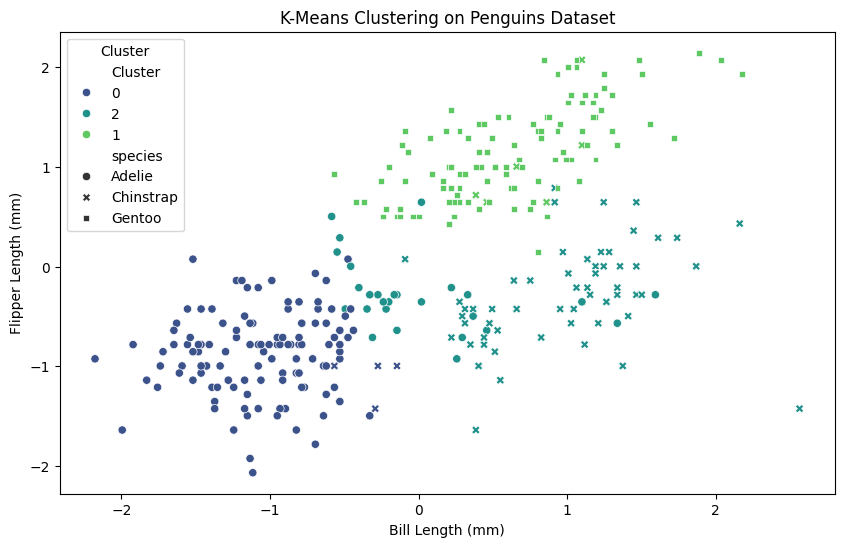

In [ ]:

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='Cluster',
    palette='viridis',
    style='species'
)
plt.title('K-Means Clustering on Penguins Dataset')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Cluster')
plt.show()


10. Elaborar conclusiones

El modelo agrupa los pinguinos por especies, por lo tanto es un muy buen modelo.

# EJERCICIO
Usted es un ingeniero de Machine Learning y debe determinar los segmentos de clientes que tiene un centro comercial. El dataset que le entregan tiene las columnas:
CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100).

Le interesa considerar que tanto gastan y que tanto ganan.


El dataset se encuentra en:
```
# url="https://raw.githubusercontent.com/alfonsoayalapaloma/ml-2024/refs/heads/main/Mall_Customers.csv"
```




1. Análisis del problema. Elección de un modelo.

2. Extracción del dataset. Limpieza.

3. EDA Análisis del dataset

4. Feature engineering.  [ determinar variables independientes(X) y dependiente(y)]

5. definir los hiperparametros del modelo

6. Crear el modelo y entrenarlo.

7. Hacer predicciones

8. Calificar el modelo

9. Visualizar el resultado del modelo

10. Conclusiones

# EJERCICIO

Realice el mismo ejercicio con el dataset de IRIS

